In [90]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

%matplotlib inline
sns.set(rc={"figure.figsize": (10, 7)})


In [3]:
titanic_data = pd.read_csv(
    r"D:\Projects\PythonProjects\DS-Rush\data\titanic\train.csv")


In [4]:
titanic_data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
X = titanic_data.drop(
    ["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
y = titanic_data.Survived


In [7]:
X.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
y.head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [9]:
X = pd.get_dummies(X)


In [10]:
X.fillna({"Age": X.Age.median()}, inplace=True)


In [11]:
X.isnull().sum()


Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [12]:
X.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [13]:
clf = tree.DecisionTreeClassifier(criterion="entropy")


In [14]:
clf.fit(X, y)


DecisionTreeClassifier(criterion='entropy')

[Text(0.6154882107400722, 0.975, 'Sex_female <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.39094934566787004, 0.925, 'Fare <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(0.19751240974729242, 0.875, 'Age <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(0.0812274368231047, 0.825, 'SibSp <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(0.0740072202166065, 0.775, 'Parch <= 0.5\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]'),
 Text(0.06678700361010831, 0.725, 'Fare <= 15.015\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05956678700361011, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0740072202166065, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0812274368231047, 0.725, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.08844765342960288, 0.775, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.31379738267148016, 0.825, 'Embarked_C <= 0.5\nentropy = 0.477\

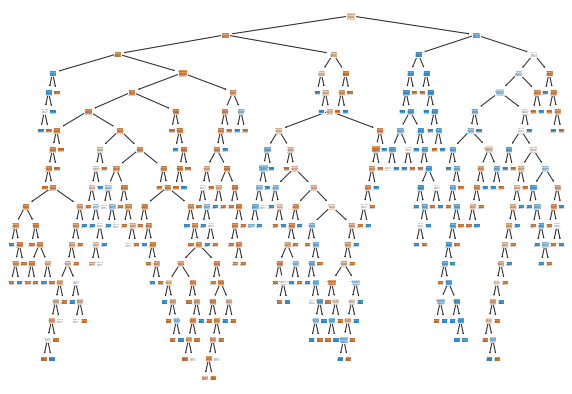

In [15]:
plot_tree(clf,
          filled=True,
          #   class_names=["Negative", "Positive"],
          feature_names=list(X))


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [17]:
X_train.shape


(596, 10)

In [18]:
clf = tree.DecisionTreeClassifier(criterion="entropy")


In [19]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)


0.9798657718120806

In [20]:
clf.score(X_test, y_test)


0.7728813559322034

In [21]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.8203389830508474

In [ ]:

max_deep_values = range(1, 51)
scores_data = pd.DataFrame()
for max_depth in max_deep_values:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train, )
    test_score = clf.score(X_test, y_test)

    tmp_score_data = pd.DataFrame(
        {"max_depth": [max_depth],
         "train_score": [train_score],
         "test_score": [test_score]})
    scores_data = scores_data.append(tmp_score_data)


In [23]:
scores_data.head()


,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


In [24]:
scores_data_long = pd.melt(scores_data, id_vars=["max_depth"],
                           value_vars=["train_score", "test_score"],
                           var_name="set_type",
                           value_name="score")


In [25]:
scores_data_long


,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
95,46,test_score,0.772881
96,47,test_score,0.776271
97,48,test_score,0.769492
98,49,test_score,0.772881


<AxesSubplot:xlabel='max_depth', ylabel='score'>

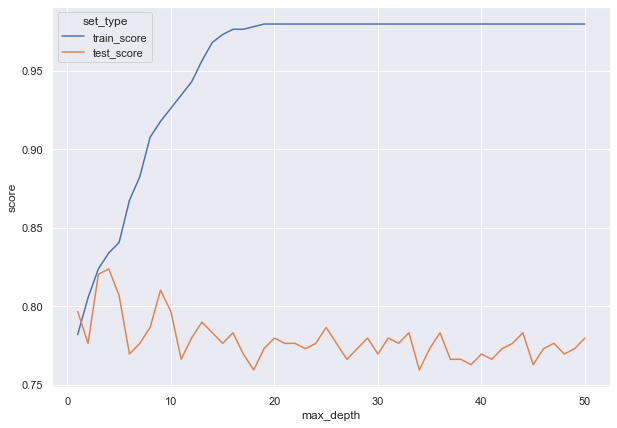

In [26]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")


# Cross Validation

In [27]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)


In [28]:
cross_val_score(clf, X_train, y_train, cv=5).mean()


0.7886274509803922

In [ ]:

max_deep_values = range(1, 101)
scores_data = pd.DataFrame()
for max_depth in max_deep_values:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train, )
    test_score = clf.score(X_test, y_test)

    mean_cross_val = cross_val_score(clf, X_train, y_train, cv=5).mean()

    tmp_score_data = pd.DataFrame(
        {"max_depth": [max_depth],
         "train_score": [train_score],
         "test_score": [test_score],
         "cross_val_score": [mean_cross_val]})
    scores_data = scores_data.append(tmp_score_data)


In [30]:
scores_data_long = pd.melt(scores_data, id_vars=["max_depth"],
                           value_vars=["train_score",
                                       "test_score", "cross_val_score"],
                           var_name="set_type",
                           value_name="score")


In [31]:
scores_data_long.query("set_type == 'cross_val_score'").head()


,max_depth,set_type,score
200,1,cross_val_score,0.781961
201,2,cross_val_score,0.770196
202,3,cross_val_score,0.790322
203,4,cross_val_score,0.788627
204,5,cross_val_score,0.795350


<AxesSubplot:xlabel='max_depth', ylabel='score'>

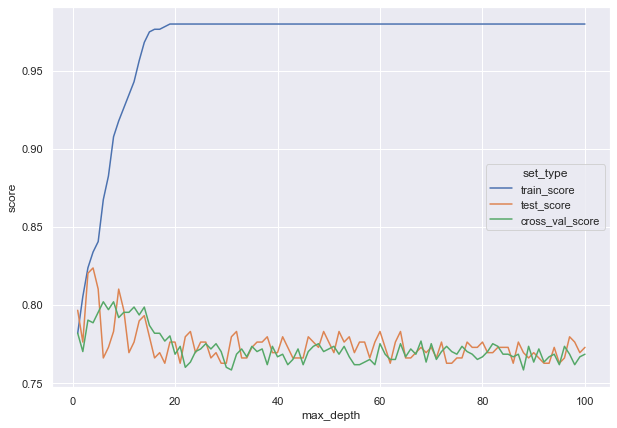

In [32]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")


In [33]:
best_classifier = tree.DecisionTreeClassifier(criterion="entropy", max_depth=6)


In [34]:
# cross_val_score(best_classifier, X_train, y_train, cv=5).mean()
cross_val_score(best_classifier, X_test, y_test, cv=5).mean()


0.8169491525423729

# Tasks

In [35]:
iris = pd.read_csv(
    "https://stepik.org/media/attachments/course/4852/train_iris.csv", index_col=0)
iris_test = pd.read_csv(
    "https://stepik.org/media/attachments/course/4852/test_iris.csv", index_col=0)
np.random.seed(0)



In [39]:
iris.head()


,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [40]:
X_train = iris.drop(["species"], axis=1)
y_train = iris.species

X_test = iris_test.drop(["species"], axis=1)
y_test = iris_test.species


In [41]:
len_range = 100 + 1
tree_depth_set = range(1, len_range)
tmp_score_data = {"max_depth": list(range(1, len_range)),
                  "cross_val_score": [],
                  "test_score": [], }
for max_deep in tree_depth_set:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_deep)

    clf.fit(X_train, y_train)

    test_score = clf.score(X_test, y_test)
    mean_cross_val = cross_val_score(clf, X_train, y_train, cv=5).mean()

    tmp_score_data["cross_val_score"].append(mean_cross_val)
    tmp_score_data["test_score"].append(test_score)


In [42]:
scores_data = pd.DataFrame(tmp_score_data)
scores_data.head()

,max_depth,cross_val_score,test_score
0,1,0.70,0.60
1,2,0.95,0.94
2,3,0.96,0.94
3,4,0.96,0.94
4,5,0.96,0.92


In [43]:
scores_data_long = pd.melt(scores_data,
                           id_vars=["max_depth"],
                           value_vars=["cross_val_score", "test_score"],
                           var_name="set_type",
                           value_name="score")

In [44]:
scores_data_long.head()

,max_depth,set_type,score
0,1,cross_val_score,0.70
1,2,cross_val_score,0.95
2,3,cross_val_score,0.96
3,4,cross_val_score,0.96
4,5,cross_val_score,0.96


<AxesSubplot:xlabel='max_depth', ylabel='score'>

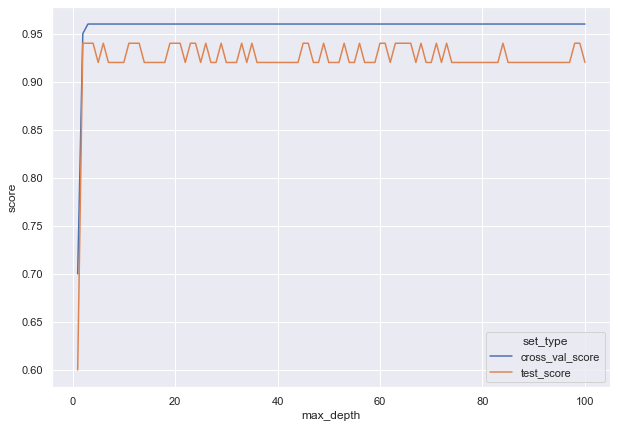

In [45]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")

In [80]:
data = pd.read_csv("https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv")
data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [81]:
# 1 - Dog, 0 - Cat
data = pd.get_dummies(data, drop_first=1)
data.rename({"Вид_собачка": "Вид"}, axis=1, inplace=True)
data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,1
1,20,24.0,1,0,0,1
2,34,40.8,1,1,0,1
3,26,31.2,1,1,0,1
4,16,19.2,1,1,0,1


In [102]:
X = data.drop("Вид", axis=1)
y = data["Вид"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [103]:
X_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
632,8,3.2,1,0,1
307,20,24.0,1,1,0
475,26,31.2,1,1,0
51,25,30.0,1,1,0
344,31,37.2,1,1,0


In [104]:
y_train.head()

632    0
307    1
475    1
51     1
344    1
Name: Вид, dtype: uint8

In [105]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


1.0

[Text(0.5, 0.75, 'X[0] <= 14.5\nentropy = 1.0\nsamples = 670\nvalue = [340, 330]\nclass = Cat'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 340\nvalue = [340, 0]\nclass = Cat'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 330\nvalue = [0, 330]\nclass = Dogs')]

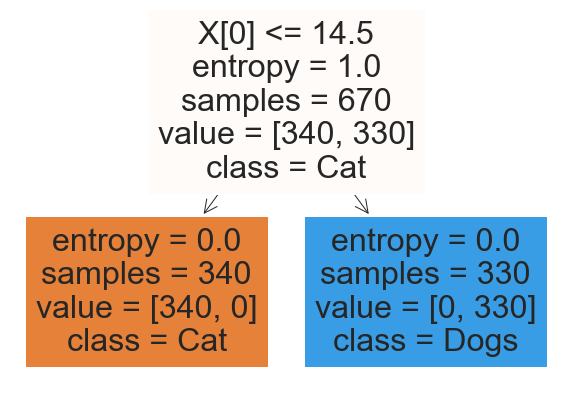

In [106]:
plot_tree(clf,
          filled=True,
          class_names=["Cat", "Dogs"])

In [107]:
test_data = pd.read_json("D:\Projects\PythonProjects\DS-Rush\dat_dogs_test.txt")
test_data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,25,30.0,1,1,0
1,18,21.6,1,1,0
2,16,19.2,1,1,0
3,30,36.0,1,1,0
4,18,21.6,1,0,0
...,...,...,...,...,...
95,8,3.2,1,0,1
96,13,5.2,1,0,1
97,7,2.8,1,0,1
98,10,4.0,1,0,1


In [109]:
clf.predict(test_data).sum()

58